<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 145,  75, ..., 255, 255,   0],
       [  0, 105,  47, ..., 131, 255,   0],
       ...,
       [  0,  11,  15, ...,  98, 227,   0],
       [  0,  64,  40, ..., 130, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
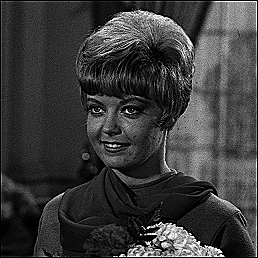

In [19]:
def convolution2d(image, kernel, stride=1, padding=1):
    # Menambah padding pada gambar
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Mendapatkan dimensi gambar dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung dimensi keluaran
    output_height = (img_height - kernel_height + 2 * padding) // stride + 1
    output_width = (img_width - kernel_width + 2 * padding) // stride + 1

    # Membuat citra keluaran
    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Melakukan konvolusi
    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(
                padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width] * kernel
            )

    # Normalisasi nilai piksel keluaran
    output = np.clip(output, 0, 255).astype(np.uint8)

    return output

img = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])
convolution2d(img_gray,kernel_sharpen,1,2)

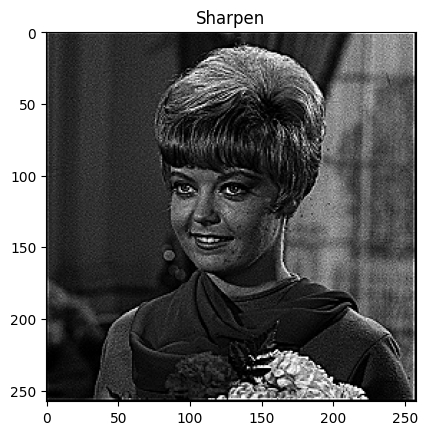

In [20]:
sharpened_img = convolution2d(img_gray,kernel_sharpen,1,2)
plt.imshow(sharpened_img,cmap='gray')
plt.axis('on')
plt.title('Sharpen')
plt.show()

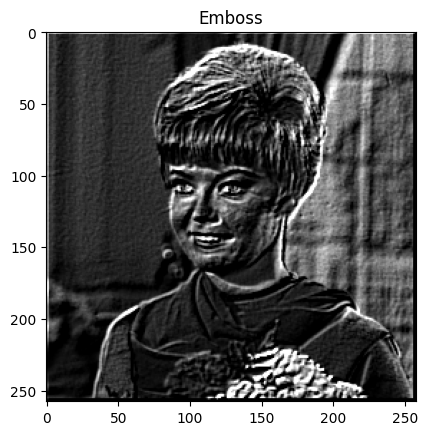

In [22]:
emboss_img = convolution2d(img_gray,kernel_emboss,1,2)
plt.imshow(emboss_img,cmap='gray')
plt.axis('on')
plt.title('Emboss')
plt.show()

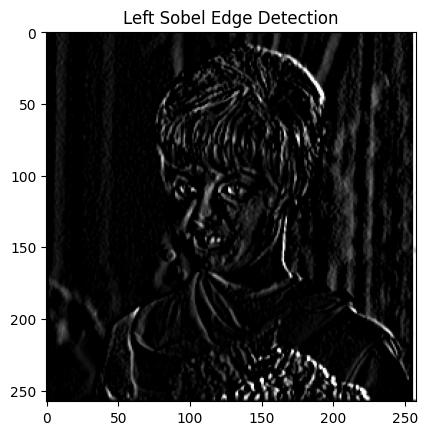

In [24]:
kernel_Left_sobel = np.array([[1,0,-1],
                              [2,0,-2],
                              [1,0,-1]])
left_sobel_img = convolution2d(img_gray,kernel_Left_sobel,1,2)
plt.imshow(left_sobel_img,cmap='gray')
plt.axis('on')
plt.title('Left Sobel Edge Detection')
plt.show()

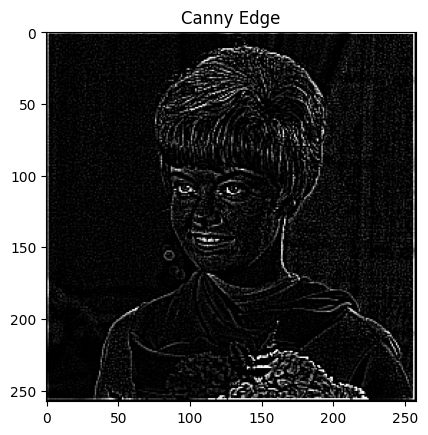

In [25]:
kernel_canny_edge = np.array([[-1,-1,-1],
                              [-1,8,-1],
                              [-1,-1,-1]])
canny_img = convolution2d(img_gray,kernel_canny_edge,1,2)
plt.imshow(canny_img,cmap='gray')
plt.axis('on')
plt.title('Canny Edge')
plt.show()

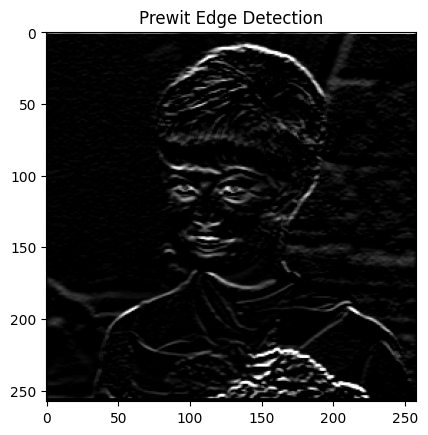

In [26]:
kernel_prewit_edge = np.array([[-1,-1,-1],
                              [0,0,0],
                              [1,1,1]])
prewit_img = convolution2d(img_gray,kernel_prewit_edge,1,2)
plt.imshow(prewit_img,cmap='gray')
plt.axis('on')
plt.title('Prewit Edge Detection')
plt.show()

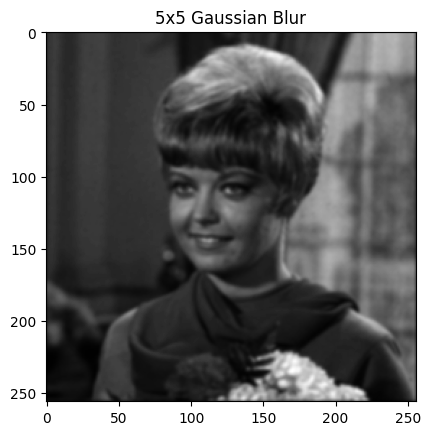

In [30]:
# Kernel Gaussian blur 5x5
sigma = 1.0
kernel_size = 5
kernel_gaussian = cv.getGaussianKernel(kernel_size, sigma) * cv.getGaussianKernel(kernel_size, sigma).T

# Menerapkan konvolusi
blurred_image = convolution2d(img_gray, kernel_gaussian, stride=1, padding=2)

plt.imshow(blurred_image, cmap='gray')
plt.axis('on')
plt.title('5x5 Gaussian Blur')
plt.show()

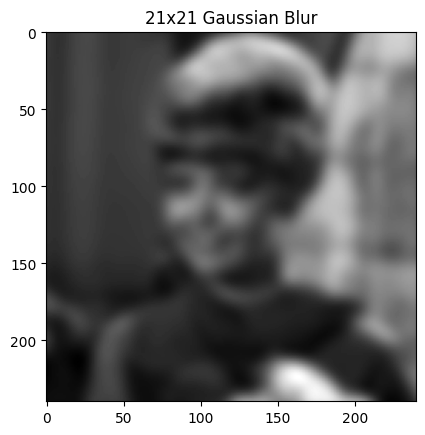

In [29]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

blurred_21_image = convolution2d(img_gray, gauss_kernel, stride=1, padding=2)

plt.imshow(blurred_21_image, cmap='gray')
plt.axis('on')
plt.title('21x21 Gaussian Blur')
plt.show()